In [2]:

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [3]:

print(tf.__version__)

2.10.0


In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [5]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

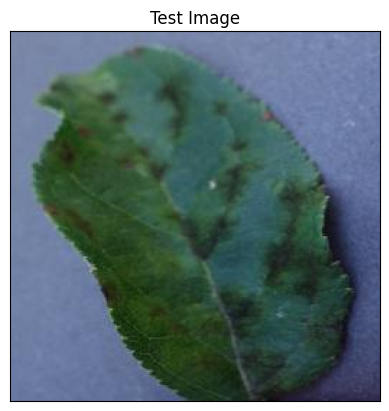

In [13]:
#Test Image Visualization
import cv2
image_path = "S:\\Plant_Disease_Dataset\\Plant_Disease_Dataset\\test\\test\\AppleScab2.JPG"
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [14]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 34ms/step


In [15]:
print(predictions)

[[9.89079535e-01 4.77386797e-10 3.55812532e-11 1.02155516e-02
  7.42275486e-09 6.38709707e-09 5.62890845e-10 8.35344593e-09
  5.72530157e-09 1.34694034e-09 2.98361935e-09 1.62320383e-11
  2.09921002e-13 4.41013588e-12 1.91655177e-12 1.33473378e-07
  1.07905180e-05 1.97735495e-09 1.75557311e-08 1.41015803e-07
  1.06132205e-07 4.99149280e-07 3.16169135e-09 3.59623824e-11
  5.78982950e-09 1.88194238e-09 3.52110369e-10 1.79893060e-08
  1.04742723e-12 1.88917859e-09 1.80955141e-07 6.93116570e-04
  2.13601385e-08 3.79912898e-12 1.07657433e-11 8.71257927e-12
  2.48282926e-12 1.86087945e-09]]


In [16]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

0


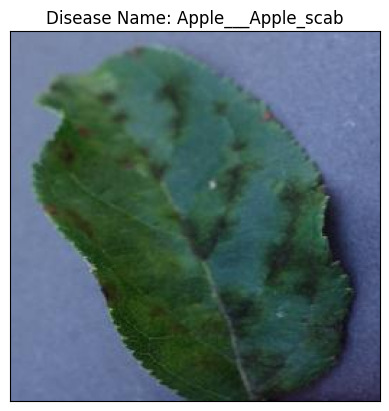

In [17]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
#Test Image Visualization
import cv2
image_path = 'test/test/TomatoYellowCurlVirus3.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [12]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 17ms/step


In [13]:
print(predictions)

[[5.7805323e-06 8.6067968e-07 9.6198107e-04 8.2737497e-06 1.7238787e-04
  5.4095930e-05 1.7366386e-06 1.2185551e-05 3.1681318e-06 4.8045094e-05
  1.1516750e-04 1.1100956e-05 5.5240846e-05 6.1929231e-06 7.9930572e-08
  3.3437132e-04 7.6816202e-04 1.6992342e-05 1.0640769e-05 5.0685085e-05
  3.4503523e-07 5.0769768e-06 3.1435131e-06 7.2497860e-05 1.2189008e-06
  1.0517738e-04 2.4028310e-05 3.6360706e-07 1.6633079e-03 4.2468529e-02
  6.1356112e-02 4.4216206e-03 4.8363214e-05 3.7295270e-06 4.7203092e-04
  8.8600862e-01 5.2783242e-04 1.8086021e-04]]


In [14]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

35


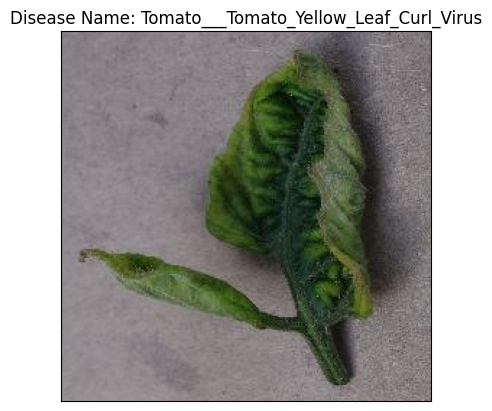

In [15]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

Found 17572 files belonging to 38 classes.
550/550 [==============================] - 46s 79ms/step - loss: 0.1361 - accuracy: 0.9608
Validation accuracy: 0.9608
550/550 [==============================] - 34s 62ms/step

Detailed Validation Metrics:
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.92      0.95       504
                                 Apple___Black_rot       0.98      0.99      0.99       497
                          Apple___Cedar_apple_rust       0.95      1.00      0.97       440
                                   Apple___healthy       0.94      0.97      0.95       502
                               Blueberry___healthy       0.88      0.99      0.93       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.97      0.98       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.98       456
Corn_(maize)__

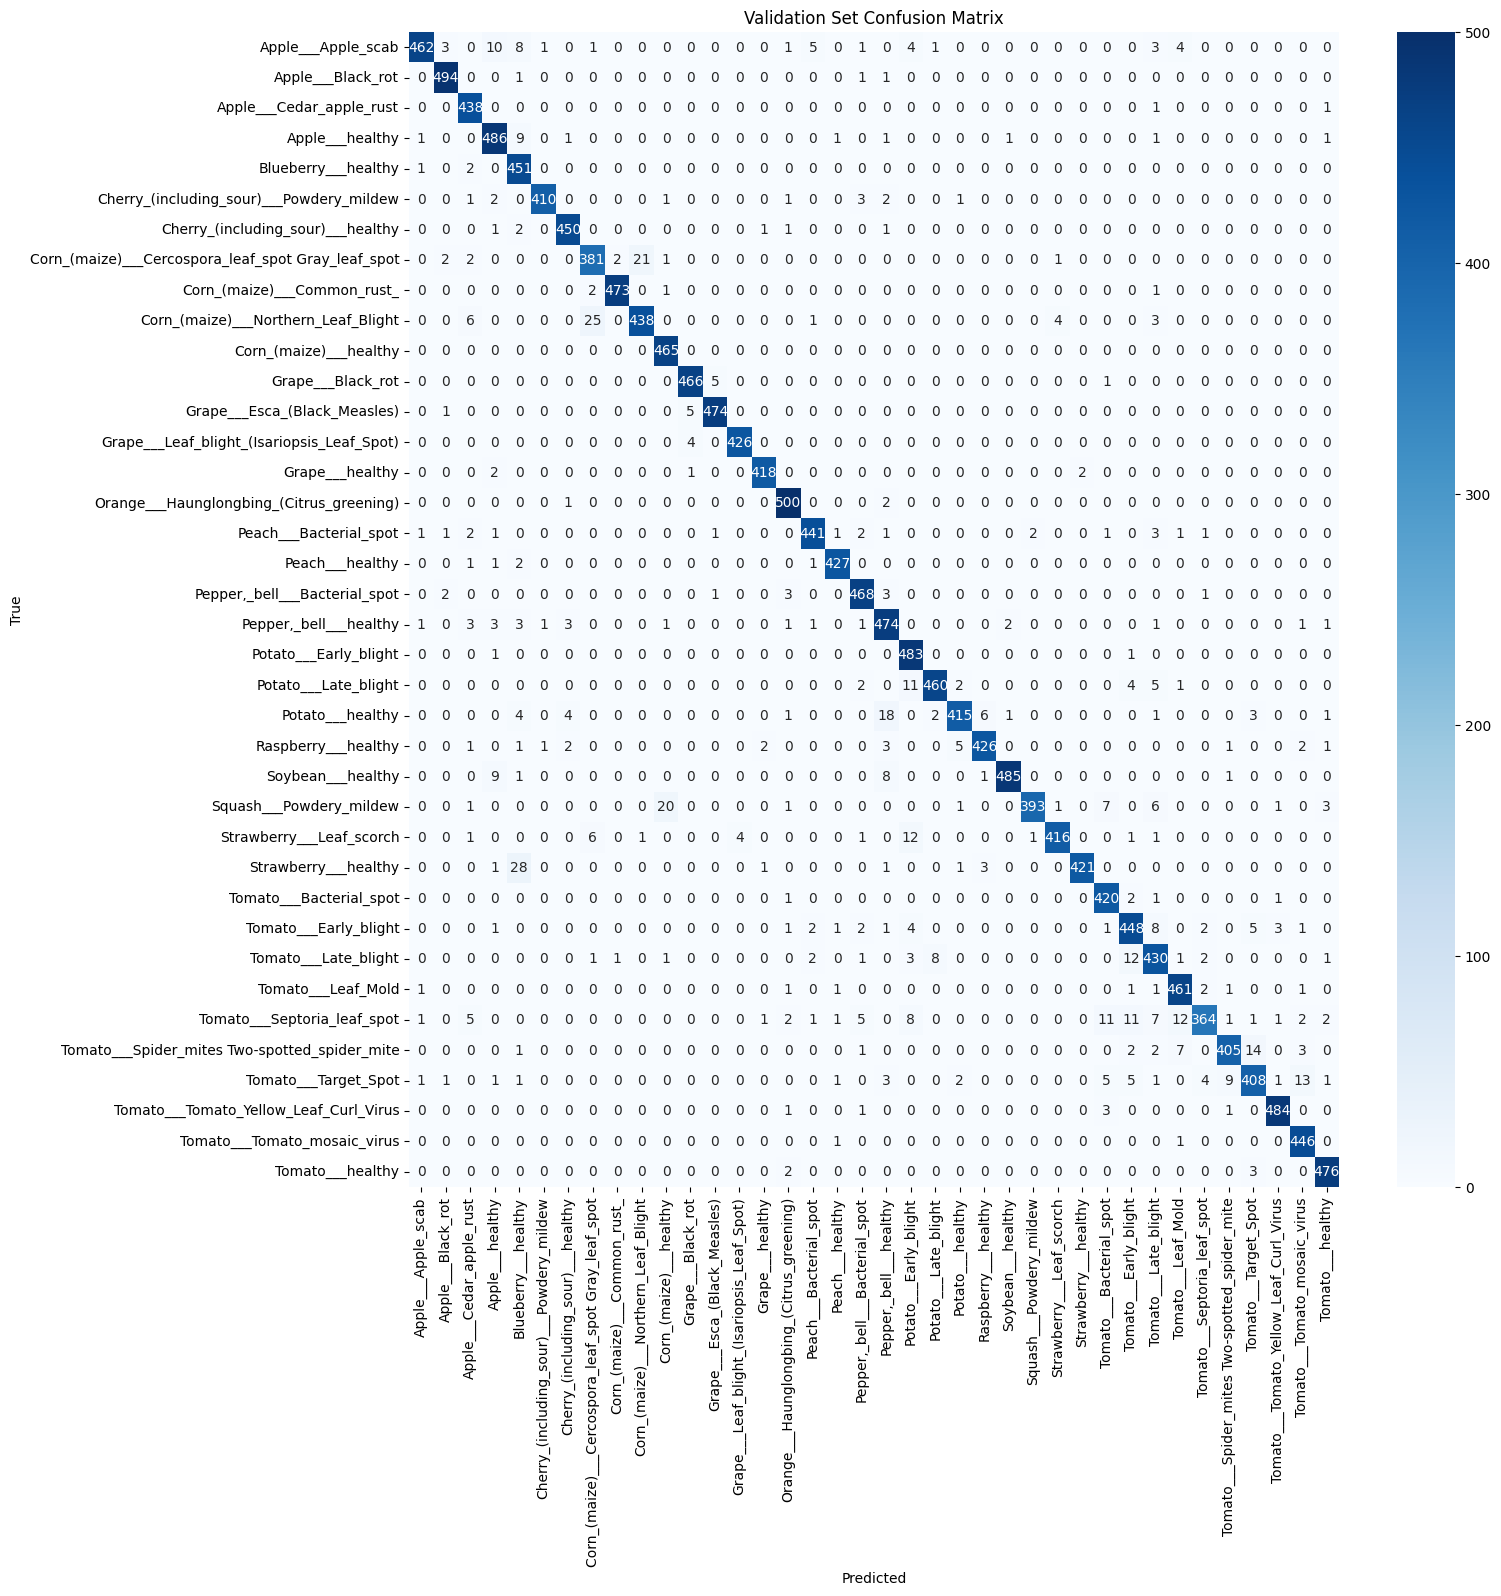


Accuracy Comparison:


NameError: name 'train_acc' is not defined

In [19]:
# Step 1: Load your validation dataset
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',  # Your validation data directory
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False  # Important for consistent evaluation
)

# Step 2: Calculate validation accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print(f'Validation accuracy: {val_acc:.4f}')

# Step 3: Get detailed metrics
# Get predictions
y_pred = cnn.predict(validation_set)
predicted_categories = tf.argmax(y_pred, axis=1)

# Get true labels
true_categories = tf.concat([y for x, y in validation_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

# Step 4: Generate classification report
from sklearn.metrics import classification_report
print("\nDetailed Validation Metrics:")
print(classification_report(Y_true, predicted_categories, target_names=validation_set.class_names))

# Step 5: Visualize results
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_true, predicted_categories)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=validation_set.class_names,
            yticklabels=validation_set.class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Validation Set Confusion Matrix')
plt.show()

# Step 6: Compare with training accuracy
print("\nAccuracy Comparison:")
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Difference: {abs(train_acc - val_acc):.4f}")

In [2]:
import os
print("Current working directory:", os.getcwd())

Current working directory: s:\Plant_Disease_Dataset\Plant_Disease_Dataset
